In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
data["gender"]

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

In [4]:
data2 = data.drop('img_name' , axis=1)
data2.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
X = data["pixels"]
Y = data["age"]

In [6]:
X.head()

0    129 128 128 126 127 130 133 135 139 142 145 14...
1    164 74 111 168 169 171 175 182 184 188 193 199...
2    67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3    193 197 198 200 199 200 202 203 204 205 208 21...
4    202 205 209 210 209 209 210 211 212 214 218 21...
Name: pixels, dtype: object

In [7]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: age, dtype: int64

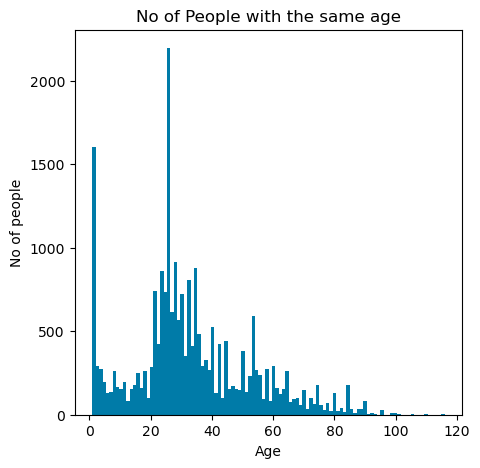

In [8]:
plt.figure(figsize=(5,5))
plt.hist(data['age'], bins=104, color='#007BA8')
plt.xlabel('Age')
plt.ylabel('No of people')
plt.title('No of People with the same age')
plt.show()

In [52]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

data2["age_category"] = pd.cut(data2["age"], bins=[0, 3, 18, 45, 64, 116], labels=[0, 1, 2, 3, 4])
age_counts = data2["age_category"].value_counts()

# Creating  a pie chart using Plotly
fig = go.Figure(data=go.Pie(
    labels=age_counts.index,
    values=age_counts.values,
    hole=0.4,
    hoverinfo='label+percent',
    textinfo='value',
    textfont=dict(size=15),
    marker=dict(colors=px.colors.qualitative.Pastel)
))

fig.update_layout(
    title="Percentage of Different age categories",
    showlegend=True,
    legend=dict(title="Age Category"),
    font=dict(size=14),
)

fig.show()

In [51]:
data2["age_category"] = pd.cut(data2["age"], bins=[0, 3, 18, 45, 64, 116], labels=[0, 1, 2, 3, 4])
age_counts = data2["age_category"].value_counts()

# To provide  set of color palettes  mate
colors = px.colors.qualitative.Pastel


fig = go.Figure(data=go.Bar(
    x=age_counts.index,
    y=age_counts.values,
    marker=dict(color=colors)
))


fig.update_layout(
    title="No of people in different age Categories",
    xaxis=dict(title="Age Category"),
    yaxis=dict(title="Count"),
    font=dict(size=14),
)

# To Show the fianl plot mate
fig.show()

In [11]:
import pandas as pd
X = pd.Series(data['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x: np.array(list(map(lambda z: int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

# reshaping data
X = X.reshape(-1, 48, 48, 1)
print("X shape: ", X.shape)

X shape:  (23705, 48, 48, 1)



Before Dividing into classes : 



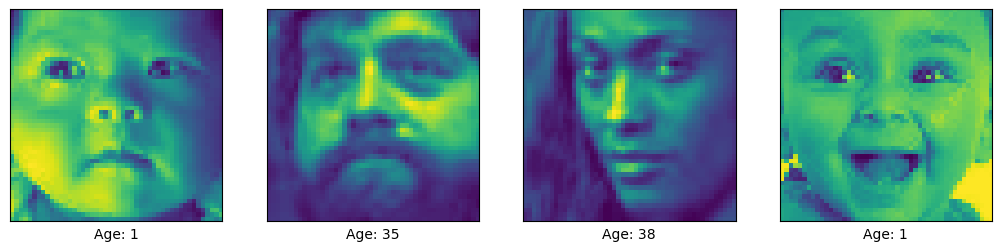


      Age      vs   Age Category

     0 to 3    =          0 
    04 to 18   =          1 
    19 to 45   =          2 
    46 to 64   =          3 
    65 to 116  =          4 


After Dividing into classes : 



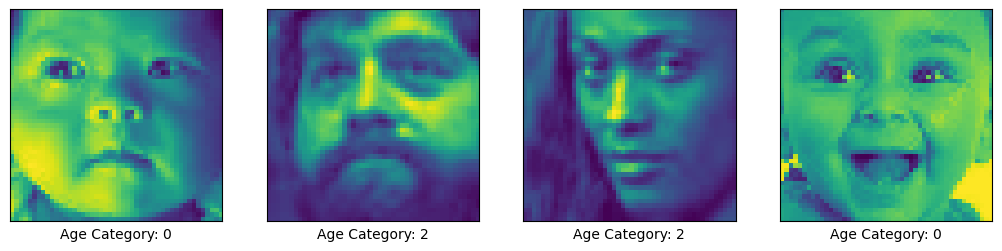

In [12]:
import numpy as np
import matplotlib.pyplot as plt

random_indices = np.random.randint(0, 23705, 23704)
print()

print("Before Dividing into classes : ")
print()

plt.figure(figsize=(16, 16))
for i, a in zip(random_indices, range(1, 5)):
    plt.subplot(5, 5, a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel("Age: " + str(Y.iloc[i]))

plt.show()

Y = data2["age"]
Y1 = data2["age_category"]


print()

print("      Age      vs   Age Category")
print()
print("     0 to 3    =          0 ")
print("    04 to 18   =          1 ")
print("    19 to 45   =          2 ")
print("    46 to 64   =          3 ")
print("    65 to 116  =          4 ")
print()


print()
print("After Dividing into classes : ")
print()

plt.figure(figsize=(16, 16))
for i, a in zip(random_indices, range(1, 5)):
    plt.subplot(5, 5, a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel("Age Category: " + str(Y1.iloc[i]))

plt.show()

In [13]:
print(Y)

0         1
1         1
2         1
3         1
4         1
         ..
23700    99
23701    99
23702    99
23703    99
23704    99
Name: age, Length: 23705, dtype: int64


In [14]:
X.shape

(23705, 48, 48, 1)

In [15]:
def show_plot(x,index):
    plt.figure(figsize= (3,3))
    plt.imshow(x[index])

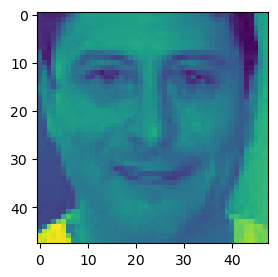

In [17]:
show_plot(X,11111)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [20]:
X

array([[[[129],
         [128],
         [128],
         ...,
         [118],
         [ 99],
         [ 53]],

        [[130],
         [129],
         [128],
         ...,
         [117],
         [ 98],
         [ 52]],

        [[131],
         [129],
         [130],
         ...,
         [114],
         [ 97],
         [ 50]],

        ...,

        [[121],
         [138],
         [147],
         ...,
         [151],
         [150],
         [148]],

        [[117],
         [137],
         [146],
         ...,
         [149],
         [148],
         [148]],

        [[115],
         [135],
         [142],
         ...,
         [146],
         [146],
         [146]]],


       [[[164],
         [ 74],
         [111],
         ...,
         [111],
         [111],
         [104]],

        [[179],
         [ 70],
         [128],
         ...,
         [112],
         [113],
         [108]],

        [[176],
         [ 71],
         [146],
         ...,
         [112],
         [

In [21]:
X = X /255

In [22]:
X

array([[[[0.50588235],
         [0.50196078],
         [0.50196078],
         ...,
         [0.4627451 ],
         [0.38823529],
         [0.20784314]],

        [[0.50980392],
         [0.50588235],
         [0.50196078],
         ...,
         [0.45882353],
         [0.38431373],
         [0.20392157]],

        [[0.51372549],
         [0.50588235],
         [0.50980392],
         ...,
         [0.44705882],
         [0.38039216],
         [0.19607843]],

        ...,

        [[0.4745098 ],
         [0.54117647],
         [0.57647059],
         ...,
         [0.59215686],
         [0.58823529],
         [0.58039216]],

        [[0.45882353],
         [0.5372549 ],
         [0.57254902],
         ...,
         [0.58431373],
         [0.58039216],
         [0.58039216]],

        [[0.45098039],
         [0.52941176],
         [0.55686275],
         ...,
         [0.57254902],
         [0.57254902],
         [0.57254902]]],


       [[[0.64313725],
         [0.29019608],
         [0.43

In [23]:
from sklearn.model_selection import train_test_split
y = data2["age_category"]
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [24]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (16593, 48, 48, 1)
Shape of Y_train:  (16593,)
Shape of X_test:  (7112, 48, 48, 1)
Shape of Y_test:  (7112,)


In [29]:
data2

,age,ethnicity,gender,pixels,age_category
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...,0
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...,0
...,...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...,4
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...,4
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...,4
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...,4


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define your model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train your model and store the history
history = model.fit(X_train, Y_train, epochs=25, batch_size=32)


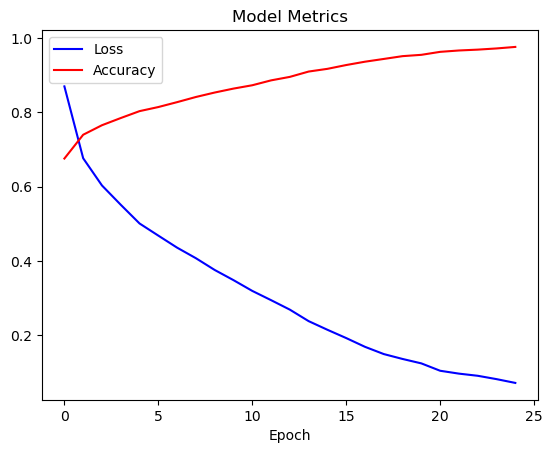

In [44]:
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.title('Model Metrics')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [43]:
predicted_labels = model.predict(X_test)

predicted_labels = np.argmax(predicted_labels, axis=1)

accuracy = np.mean(predicted_labels == Y_test)

print('Accuracy:', accuracy*100,"%")

223/223 [==============================] - 3s 12ms/step
Accuracy: 76.4482564679415 %


In [32]:
X_test.shape

(7112, 48, 48, 1)

In [33]:
Y_test.shape

(7112,)

In [34]:
Y_test= Y_test.to_numpy()

1/1 [==============================] - 0s 26ms/step
True Label: 2
Predicted Label: 2
prediction is correct


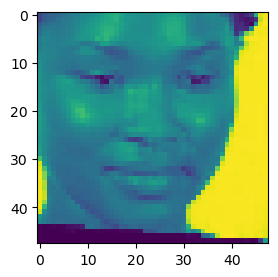

In [49]:
import numpy as np

random_index = np.random.randint(0, len(X_test)) 

test_image = X_test[random_index]

true_label = Y_test[random_index]

test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)

predicted_label = np.argmax(prediction)

print('True Label:', true_label)

show_plot(X_test,random_index)

print('Predicted Label:', predicted_label)

if(true_label == predicted_label):

    print("prediction is correct")

else:
    
    print("prediction is wrong")

223/223 [==============================] - 2s 10ms/step


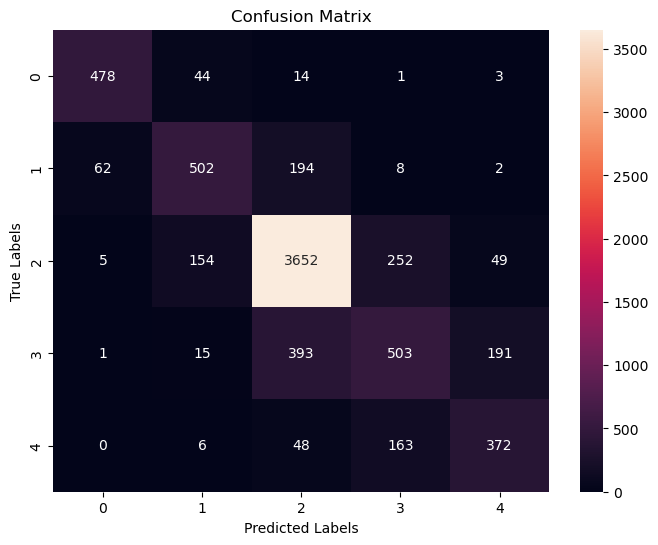

In [36]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predicting on all samples in X_test
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Creating confusion matrix
cm = confusion_matrix(Y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=[0,1,2,3,4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()